# **Cardio Disease Prediction Project**

## Introduction

The data chosen for this project is `cardio disease prediction` data taken from Kaggle [here](https://www.kaggle.com/code/bhargavi35/starter-cardiovascular-disease-dataset-d2fc2521-9). The dataset is combined with the [heart disease dataset](https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression/input) and the combination returned some good features to predict `CardioDisease` in patients. With this dataset, we'll end up with:

1. Exploratory Analysis and Preprocessing with the data
2. Supervised Learning (Regression)
3. Unsupervised Learning (Clustering)
4. Supervised Learning (Classification)

The original dataset had more features but this concised data is used for the right prediction of the disease in patients.

## Importing Dependencies

To perform analysis on data (along with supervised and unsupervised modelling), we need to import different packages which are required to perform certain tasks. Here are the dependencies required for certain tasks 

In [1]:
# libraries for data processing and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler

In [2]:
# regression models from scikit learn

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
# classification models from scikit learn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [4]:
## Model evaluators

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils import resample

## **Part 1: Data Collection, Preprocessing and EDA**

### Load Data

In [5]:
df = pd.read_csv(filepath_or_buffer="../Data/DatesetProject.csv")

Let's check the shape of data

In [6]:
print(f"(Rows, Columns): {df.shape}")

(Rows, Columns): (74238, 10)


In [7]:
# column names
print(f"Dataset features: {list(df.columns)}")

Dataset features: ['gender', 'age', 'smoke ', 'sysBP', 'diaBP', 'BMI', 'Chol', 'glucose', 'active ', 'CardioDisease']


The dataset has 74238 rows and 10 features namely shown above

Now, we should have a look on how our data looks like

In [8]:
# prinitng first 5 rows of the dataset
df.head()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease
0,2,50,0,110.0,80.0,66.115702,1,1,1,0
1,1,55,0,140.0,90.0,45.918367,3,1,1,1
2,1,51,0,130.0,70.0,41.420118,3,1,0,1
3,2,48,0,150.0,100.0,44.444444,1,1,1,1
4,1,47,0,100.0,60.0,60.000000,1,1,0,0


In [9]:
# printing last 5 rows of the dataset
df.tail()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease
74233,2,50,1,179.0,92.0,25.97,3,1,1,1
74234,2,51,1,126.5,80.0,19.71,2,1,1,0
74235,1,48,1,131.0,72.0,22.00,3,1,1,0
74236,1,44,1,126.5,87.0,19.16,2,3,1,0
74237,1,52,0,133.5,83.0,21.47,3,2,1,0


### Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74238 entries, 0 to 74237
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         74238 non-null  int64  
 1   age            74238 non-null  int64  
 2   smoke          74238 non-null  int64  
 3   sysBP          74238 non-null  float64
 4   diaBP          74238 non-null  float64
 5   BMI            74219 non-null  float64
 6   Chol           74238 non-null  int64  
 7   glucose        74238 non-null  int64  
 8   active         74238 non-null  int64  
 9   CardioDisease  74238 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 5.7 MB


Observation: The data set has 74238 rows indexed from 0_74237 and 10 columns indexed from 0_9. All columns have datatype integer except three columns `sysBP`, `diaBP`, `BMI`, which have float values.

In [11]:
df.describe()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease
count,74238.000000,74238.000000,74238.000000,74238.000000,74238.000000,7.421900e+04,74238.000000,74238.000000,74238.000000,74238.000000
mean,1.354118,52.654813,0.111304,129.019094,95.846218,4.977409e+02,1.417859,1.230004,0.806204,0.479849
std,0.478248,6.923851,0.314511,149.645659,183.063638,8.642367e+04,0.715949,0.577491,0.395273,0.499597
min,1.000000,29.000000,0.000000,-150.000000,-70.000000,-3.111111e+03,1.000000,1.000000,0.000000,0.000000
25%,1.000000,48.000000,0.000000,120.000000,80.000000,4.591837e+01,1.000000,1.000000,1.000000,0.000000
50%,1.000000,53.000000,0.000000,120.000000,80.000000,5.555556e+01,1.000000,1.000000,1.000000,0.000000
75%,2.000000,58.000000,0.000000,140.000000,90.000000,5.555556e+01,2.000000,1.000000,1.000000,1.000000
max,2.000000,70.000000,1.000000,16020.000000,11000.000000,2.088000e+07,3.000000,3.000000,1.000000,1.000000


### Data Pre-Processing

In [12]:
#Data Reduction
df.isna().sum()     # finding missing values

gender            0
age               0
smoke             0
sysBP             0
diaBP             0
BMI              19
Chol              0
glucose           0
active            0
CardioDisease     0
dtype: int64

**Observation**: BMI column has 19 missing value rows.

#### Data Reduction

In [13]:
# deleting null rows

df.dropna(subset=['BMI'], inplace=True)
print("Data shape after dropping null rows: " , df.shape)

Data shape after dropping null rows:  (74219, 10)


 The percentage of null rows was not significant so we dropped the rows from dataset. Total no of records are 74219.

In [14]:
# finding no of duplicated rows
print("Total duplicate samples are: ", df.duplicated().sum())

Total duplicate samples are:  49928


**Observation**: Total number of duplicated rows is 48828. This will affect the accuracy of our ML model so we will drop them.

In [15]:
# deleting no of duplicated rows

df.drop_duplicates(inplace = True)

In [16]:
print("Data shape after dropping duplicates: " , df.shape)

Data shape after dropping duplicates:  (24291, 10)


**Outliers**

In [17]:
print(df['sysBP'].min())
df['sysBP'].max()

-150.0


16020.0

In [18]:
negative_sysBP = df[df['sysBP'] < 0]

In [19]:
negative_sysBP.shape[0]

7

**Observation**: There are 7 rows which have a negative value for sysBP (outliers)

In [20]:
print(df['diaBP'].min())
df['diaBP'].max()

-70.0


11000.0

In [21]:
negative_diaBP = df[df['diaBP'] < 0]
negative_diaBP.shape[0]

1

In [22]:
# dropping row with negative value in diaBP and sysBP
mask = df['diaBP'] < 0
df = df.drop(df[mask].index)

mask_sys = df['sysBP'] < 0
df = df.drop(df[mask_sys].index)

In [23]:
df.shape

(24283, 10)

#### Data Visualization

In [24]:
# no of classes in the target attribute
df['CardioDisease'].value_counts()

1    12461
0    11822
Name: CardioDisease, dtype: int64

**Observation**: There are two classes for the target variable "CardioDisease." We will implement binary classification.

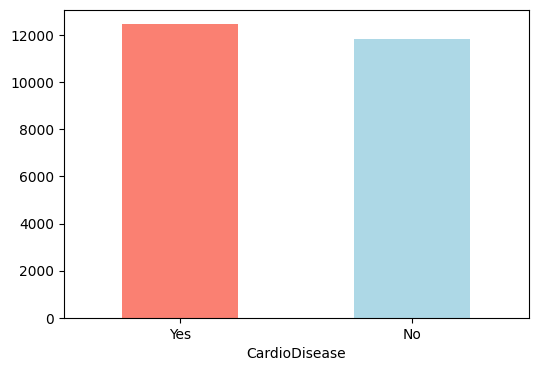

In [25]:
# Data Visualization
df['CardioDisease'].value_counts().plot(
    kind='bar',
    figsize=(6, 4), 
    color=['salmon', 'lightblue'], 
    xlabel='CardioDisease'
)

plt.xticks([0,1],['Yes', 'No'], rotation=0)
plt.show();

In [26]:
# column names
df.columns

Index(['gender', 'age', 'smoke ', 'sysBP', 'diaBP', 'BMI', 'Chol', 'glucose',
       'active ', 'CardioDisease'],
      dtype='object')

In [27]:
df['gender'].value_counts()

1    13684
2    10599
Name: gender, dtype: int64

In [28]:
# CardioDisease Frequency to gender

pd.crosstab(df['gender'], df['CardioDisease'])

CardioDisease,0,1
gender,,
1,6789,6895
2,5033,5566


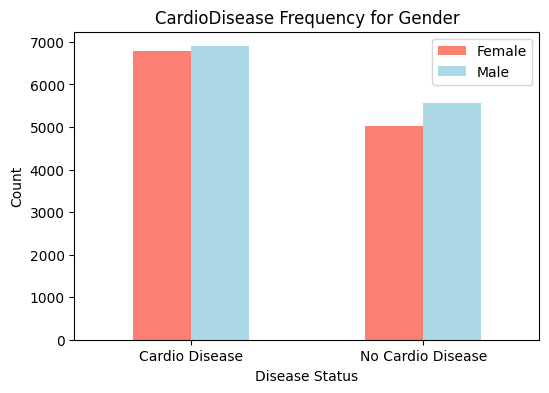

In [29]:
# plotting crosstab
pd.crosstab(df['gender'], df['CardioDisease']).plot(kind='bar', figsize=(6, 4), color=['salmon', 'lightblue']);
target_counts = df['CardioDisease'].value_counts()

plt.title("CardioDisease Frequency for Gender")
plt.xticks(target_counts.index, ['No Cardio Disease', 'Cardio Disease'], rotation = 360)
plt.xlabel('Disease Status')
plt.ylabel('Count')
plt.legend(['Female', 'Male']);

In [30]:
# maximum and minimum age of patients

print("Minimum age of patients: " , df['age'].min())
print("Maximum age of patients: " , df['age'].max())

Minimum age of patients:  29
Maximum age of patients:  70


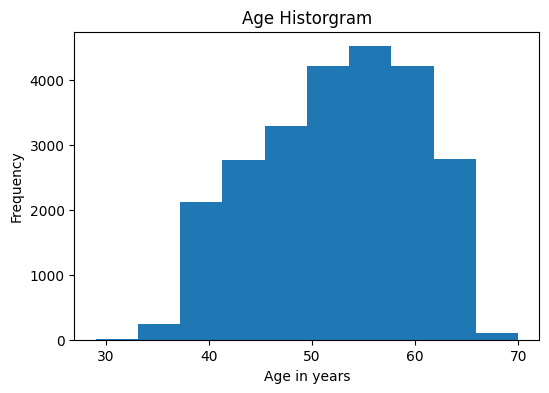

In [31]:
df['age'].plot(kind='hist', figsize=(6 , 4));
plt.title("Age Historgram")
plt.xlabel("Age in years")
plt.show();

**Observation**: Highest frequency of patients lies between 50-60 years. An observeble increase in frequency of patients above 35 years.

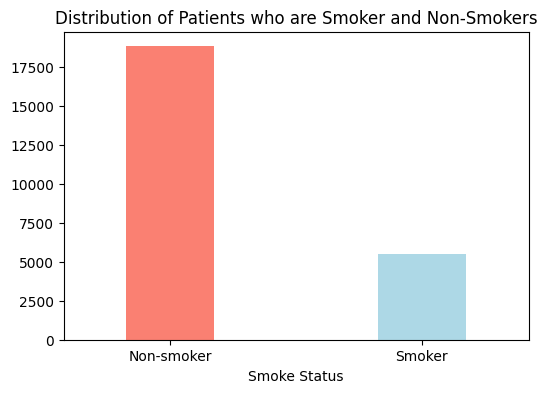

In [32]:
# visualizing frequency of smoker and non smokers in patienst
df['smoke '].value_counts().plot(kind='bar', figsize=(6, 4), width = 0.35, color=['salmon', 'lightblue'], xlabel="Smoke Status")
plt.title("Distribution of Patients who are Smoker and Non-Smokers")
plt.xticks([0,1], ['Non-smoker', 'Smoker'], rotation=0)
plt.show();

In [33]:
# Average cholesterol values for smoker and non-smokers patients

avg_chol_smokers = df[df['smoke '] == 1]['Chol'].mean()
avg_chol_non_smokers = df[df['smoke '] == 0]['Chol'].mean()

print("Average Cholesterol for Smokers:", round(avg_chol_smokers, 2))
print("Average Cholesterol for Non-Smokers:", round(avg_chol_non_smokers, 2))

Average Cholesterol for Smokers: 1.83
Average Cholesterol for Non-Smokers: 1.75


**Observation**: On average smokers have a slightly higher cholesterol level compared to non-smokers, indicating its role in increasing risk of Cardiovascular Disease.

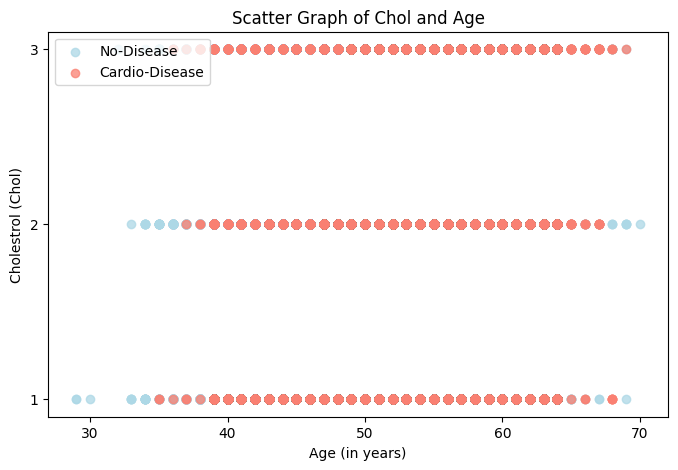

In [34]:
# Exploring Distrbution of Cholestrol and Age with disease status

t_0 = df[df['CardioDisease'] == 0]
t_1 = df[df['CardioDisease'] == 1]

plt.figure(figsize= [8,5])
plt.scatter(t_0['age'], t_0['Chol'], label="No-Disease", color ='lightblue', alpha=0.75 )
plt.scatter(t_1['age'], t_1['Chol'], label="Cardio-Disease", color ='salmon', alpha=0.75 )



plt.title('Scatter Graph of Chol and Age')
plt.xlabel('Age (in years)')
plt.ylabel('Cholestrol (Chol)')
plt.yticks(np.arange(1, 4, step = 1.0))
plt.legend()

plt.show();

#### Correlation Matrix and Heatmap

In [35]:
## corr matrix

df.corr()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease
gender,1.000000,-0.019478,0.284164,-0.003216,0.001950,0.003822,-0.052293,-0.053967,0.032348,0.021106
age,-0.019478,1.000000,-0.138453,0.015098,0.021636,-0.005562,0.096777,0.095674,-0.021944,0.173488
smoke,0.284164,-0.138453,1.000000,-0.015732,-0.034809,0.008788,0.042237,-0.080420,0.071060,-0.109502
sysBP,-0.003216,0.015098,-0.015732,1.000000,0.008584,-0.004685,0.002288,-0.002979,0.006351,0.037049
diaBP,0.001950,0.021636,-0.034809,0.008584,1.000000,0.046263,-0.030659,-0.021452,0.022186,0.074764
BMI,0.003822,-0.005562,0.008788,-0.004685,0.046263,1.000000,-0.008264,-0.005296,0.005158,-0.002907
Chol,-0.052293,0.096777,0.042237,0.002288,-0.030659,-0.008264,1.000000,0.228249,0.084066,0.031832
glucose,-0.053967,0.095674,-0.080420,-0.002979,-0.021452,-0.005296,0.228249,1.000000,0.029771,0.051366
active,0.032348,-0.021944,0.071060,0.006351,0.022186,0.005158,0.084066,0.029771,1.000000,-0.046799
CardioDisease,0.021106,0.173488,-0.109502,0.037049,0.074764,-0.002907,0.031832,0.051366,-0.046799,1.000000


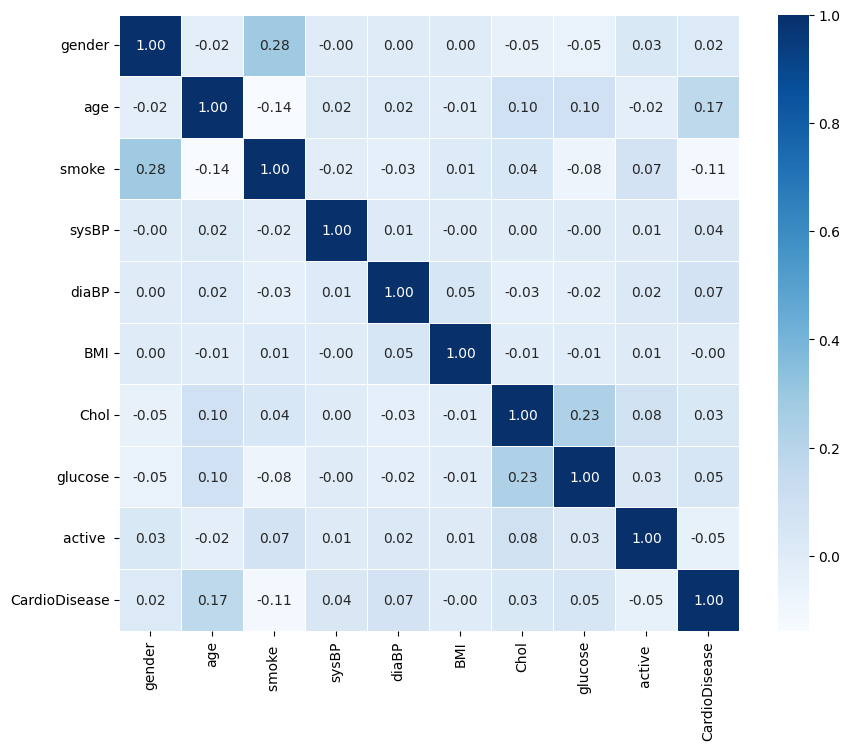

In [36]:
# PLotting a heatmap for better view

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.7, fmt=".2f", cmap="Blues");

Let's find the distribution of DiaBP and age against CardioDisease

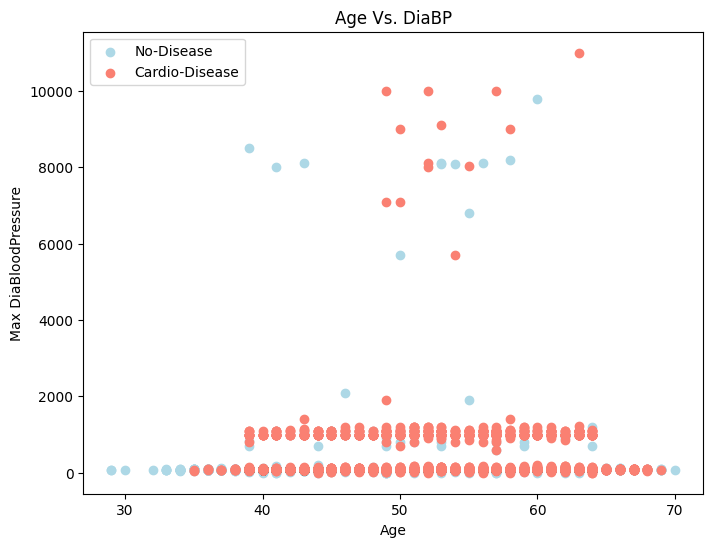

In [37]:
# Distribution of  DiaBP and age aganst CardioDisease
plt.figure(figsize=(8, 6))

plt.scatter(df['age'][df['CardioDisease']==0], df['diaBP'][df['CardioDisease']==0], c='lightblue')
plt.scatter(df['age'][df['CardioDisease']==1], df['diaBP'][df['CardioDisease']==1], c='salmon')

plt.title("Age Vs. DiaBP")
plt.xlabel("Age")
plt.ylabel("Max DiaBloodPressure")
plt.legend(['No-Disease', 'Cardio-Disease'])

plt.show();

### Train Test Split

In [38]:
# Split the data into features and labels
X = df.drop("CardioDisease", axis=1)
y = df['CardioDisease']

In [39]:
X.head()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active
0,2,50,0,110.0,80.0,66.115702,1,1,1
1,1,55,0,140.0,90.0,45.918367,3,1,1
2,1,51,0,130.0,70.0,41.420118,3,1,0
3,2,48,0,150.0,100.0,44.444444,1,1,1
4,1,47,0,100.0,60.0,60.000000,1,1,0


In [40]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: CardioDisease, dtype: int64

In [41]:
# Setting some random seed
np.random.seed(42)

In [42]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Note: size of the test data is 30 percent of the total dataset


### Data Transformation

In [43]:
# performing Data Transformation by scaling dataset

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X_train)

# Just in-case if we need scaled test dataset
X_scaled_test = scalar.fit_transform(X_test)

In [44]:
X_scaled

array([[-0.88290578,  0.61958188, -0.54022002, ..., -0.93089689,
        -0.60512142, -1.6871786 ],
       [-0.88290578, -0.60751799, -0.54022002, ..., -0.93089689,
        -0.60512142,  0.59270548],
       [ 1.13262369, -1.56192899, -0.54022002, ..., -0.93089689,
        -0.60512142,  0.59270548],
       ...,
       [-0.88290578, -0.33482913, -0.54022002, ...,  0.28872584,
        -0.60512142, -1.6871786 ],
       [-0.88290578, -1.1528957 , -0.54022002, ...,  1.50834858,
        -0.60512142,  0.59270548],
       [ 1.13262369, -0.47117356,  1.85109765, ..., -0.93089689,
        -0.60512142,  0.59270548]])

## **Part 2: Supervised Learning (Regression)**

### Support Vector Regressor

In [45]:
SVR_model = SVR(kernel='sigmoid',
                C=1.0,
                epsilon=0.2)

SVR_model.fit(X_train, y_train)

SVR(epsilon=0.2, kernel='sigmoid')

In [46]:
# Making predictions with SVR
svr_predictions = SVR_model.predict(X_test)

In [47]:
svr_predictions[:10]

array([68.21895356,  6.56381055,  0.68313985,  6.30760761,  4.85395129,
        1.22146769,  1.29889703, 12.53308541,  1.24433136,  4.68738509])

In [48]:
# setting a threshold
threshold = 0.5
svr_predictions_binary = (svr_predictions >= threshold).astype(int)

accuracy = accuracy_score(y_test, svr_predictions_binary)
print(f"Accuracy with threshold : {round(accuracy,2) * 100}%")

Accuracy with threshold : 47.0%


In [49]:
df_predictions = pd.DataFrame({'Actual': y_test, 'SVR_Predictions': svr_predictions_binary})
df_predictions.head()

,Actual,SVR_Predictions
49043,1,1
15137,0,1
37257,1,1
34858,1,1
14103,1,1


### Random Forest Regressor

In [50]:
RFR_model = RandomForestRegressor(n_estimators=300,
                                  max_depth=10,
                                  criterion="squared_error",
                                  random_state=0)

RFR_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=0)

In [51]:
RFR_predictions = RFR_model.predict(X_test)

In [52]:
threshold = 0.5
RFR_predictions_binary = (RFR_predictions >= threshold).astype(int)

RFR_accuracy = accuracy_score(y_test, RFR_predictions_binary)
print(f"RFR accuracy with threshold : {round(RFR_accuracy,2) * 100}%")

RFR accuracy with threshold : 70.0%


In [53]:
df_RFR_predictions = pd.DataFrame({'Actual': y_test, 'RFR_Predictions': RFR_predictions_binary})
df_RFR_predictions.head()

,Actual,RFR_Predictions
49043,1,1
15137,0,0
37257,1,1
34858,1,1
14103,1,0


### Evaluation of Regression models

In [54]:
# SVR evaluation
SVR_MAE = mean_absolute_error(y_true=y_test, y_pred=svr_predictions)
SVR_MSE = mean_squared_error(y_true=y_test, y_pred=svr_predictions)
SVR_RMSE = np.sqrt(SVR_MSE)

In [55]:
print("Support Vector Regressor Evaluation\n")

print("Mean Absolute Error: ", SVR_MAE)
print("Mean Squared Error: ", SVR_MSE)
print("Root Mean Squared Error: ", SVR_RMSE)

Support Vector Regressor Evaluation

Mean Absolute Error:  19.888493888048263
Mean Squared Error:  9399.939280049712
Root Mean Squared Error:  96.95328400858689


In [56]:
# RFR evaluation

RFR_MAE = mean_absolute_error(y_test, RFR_predictions)
RFR_MSE = mean_squared_error(y_test, RFR_predictions)
RFR_RMSE = np.sqrt(RFR_MSE)

In [57]:
print("Random Forest Regressor Evaluation\n")

print("Mean Absolute Error : ", RFR_MAE)
print("Mean Squared Error : ", RFR_MSE)
print("Root Mean Squared Error : ", RFR_RMSE)

Random Forest Regressor Evaluation

Mean Absolute Error :  0.38418252340669057
Mean Squared Error :  0.1958028388512741
Root Mean Squared Error :  0.4424961455778729


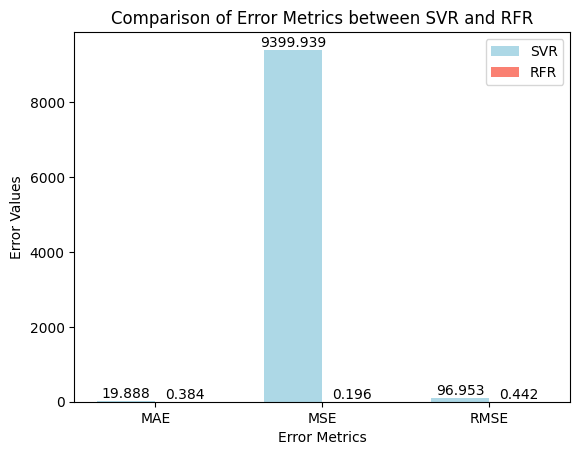

In [58]:
# visulaizing errors

svr_values = [SVR_MAE, SVR_MRegressionSE, SVR_RMSE]
rfr_values = [RFR_MAE, RFR_MSE, RFR_RMSE]

positions = np.arange(len(svr_values))
width = 0.35

fig, ax = plt.subplots()

svr_bars = ax.bar(positions - width/2, svr_values, width, label='SVR', color='lightblue')
rfr_bars = ax.bar(positions + width/2, rfr_values, width, label='RFR', color='salmon')

ax.set_xticks(positions)
ax.set_xticklabels(['MAE', 'MSE', 'RMSE'])
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Error Values')
ax.set_title('Comparison of Error Metrics between SVR and RFR')

for bars in [svr_bars, rfr_bars]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 3), ha='center', va='bottom')

ax.legend();

**Analysis:** The evaluation insights suggest that the Random Forest Regressor outperforms the Support Vector Regressor across all three metrics, indicating a higher degree of accuracy and precision in predicting cardiovascular disease. The lower values for MAE, MSE, and RMSE in the Random Forest model signify that it has a closer fit to the actual values, thereby making it the preferred regression model for our dataset.

## **Part 3: Unsupervised Learning (Clustering)**

To incorporate the clustering algorithm, we will be performing some set of operations on our data and then solve the problem of unsupervised learning on our data

### Finding and Selecting two most important Attributes

let's create a correlation matrix of the data again to see the dependencies of the features on each other. It will help us finding the most important attributes for target value prediction

In [59]:
data_correlation = df.corr()

In [60]:
data_correlation

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease
gender,1.000000,-0.019478,0.284164,-0.003216,0.001950,0.003822,-0.052293,-0.053967,0.032348,0.021106
age,-0.019478,1.000000,-0.138453,0.015098,0.021636,-0.005562,0.096777,0.095674,-0.021944,0.173488
smoke,0.284164,-0.138453,1.000000,-0.015732,-0.034809,0.008788,0.042237,-0.080420,0.071060,-0.109502
sysBP,-0.003216,0.015098,-0.015732,1.000000,0.008584,-0.004685,0.002288,-0.002979,0.006351,0.037049
diaBP,0.001950,0.021636,-0.034809,0.008584,1.000000,0.046263,-0.030659,-0.021452,0.022186,0.074764
BMI,0.003822,-0.005562,0.008788,-0.004685,0.046263,1.000000,-0.008264,-0.005296,0.005158,-0.002907
Chol,-0.052293,0.096777,0.042237,0.002288,-0.030659,-0.008264,1.000000,0.228249,0.084066,0.031832
glucose,-0.053967,0.095674,-0.080420,-0.002979,-0.021452,-0.005296,0.228249,1.000000,0.029771,0.051366
active,0.032348,-0.021944,0.071060,0.006351,0.022186,0.005158,0.084066,0.029771,1.000000,-0.046799
CardioDisease,0.021106,0.173488,-0.109502,0.037049,0.074764,-0.002907,0.031832,0.051366,-0.046799,1.000000


We need to see this correlation in a visualized way

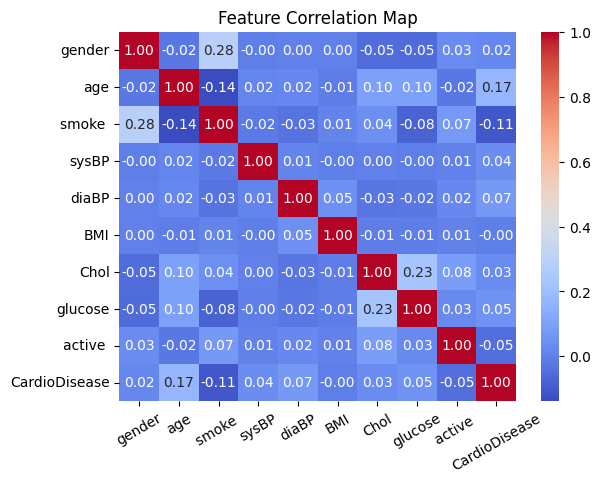

In [61]:
plt.title("Feature Correlation Map")
sns.heatmap(data_correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.xticks(rotation=30);

Need to get the feature importance to see the important features in order

In [62]:
# Split the data into features and labels
X = df.drop("CardioDisease", axis=1)
y = df["CardioDisease"]

In [63]:
X.head()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active
0,2,50,0,110.0,80.0,66.115702,1,1,1
1,1,55,0,140.0,90.0,45.918367,3,1,1
2,1,51,0,130.0,70.0,41.420118,3,1,0
3,2,48,0,150.0,100.0,44.444444,1,1,1
4,1,47,0,100.0,60.0,60.000000,1,1,0


In [64]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: CardioDisease, dtype: int64

In [65]:
# Creating a classification model to get the feature importance for our data
clf = RandomForestClassifier()

In [66]:
# Train the model on whole data (the goal is to get features importance here)
clf.fit(X, y)

RandomForestClassifier()

In [67]:
clf.score(X, y)

0.8491949100193551

In [68]:
# Check the feature importance in raw format
clf.feature_importances_

array([0.04026838, 0.32919794, 0.02368172, 0.17662528, 0.1090608 ,
       0.18240378, 0.05608519, 0.0508167 , 0.0318602 ])

In [69]:
# Get the feature importance from the trained model
feature_importance = dict(zip(df.columns, list(clf.feature_importances_)))

In [70]:
feature_importance

{'gender': 0.040268377484695306,
 'age': 0.32919794214273,
 'smoke ': 0.02368172190587918,
 'sysBP': 0.1766252833907333,
 'diaBP': 0.10906079936076245,
 'BMI': 0.18240378401765306,
 'Chol': 0.05608518621722495,
 'glucose': 0.05081670188610763,
 'active ': 0.03186020359421411}

In [71]:
max(feature_importance.values())

0.32919794214273

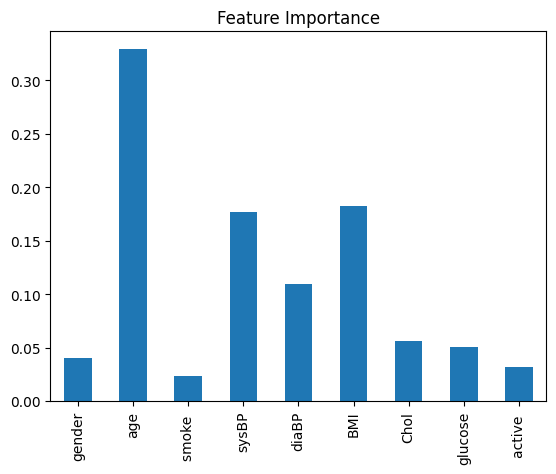

In [72]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot(kind="bar", title="Feature Importance", legend=False);

#### Recursive Feature Elimination (Optional)

We've got the feature importance from our classifier (RFC). We can see the features importance returned by the model. We can also use RFE technique to rank the features to see their importance. 

In [73]:
from sklearn.feature_selection import RFE

In [74]:
rfe = RFE(clf, n_features_to_select=1)
fit = rfe.fit(X, y)

# Print feature ranking
print("Feature Ranking:")
print(pd.DataFrame({'Feature': X.columns, 'Rank': fit.ranking_}).sort_values('Rank'))

Feature Ranking:
   Feature  Rank
5      BMI     1
3    sysBP     2
1      age     3
4    diaBP     4
6     Chol     5
7  glucose     6
0   gender     7
8  active      8
2   smoke      9


Since, both of the concepts highlight the importance of features `age`, and `BMI`, we'll go with these two features to form clusters.

#### Finalizing Important Features

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
important_features = ['age', 'BMI']

# Extracting the relevant subset of data
X_cluster = df[important_features]

# Standardize the data
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

### Hierarchical Clustering Algorithm

To perform hierarchical clustering, we can select certain linkage and distance criteria. As we know that, `euclidean` is the common and fit to the data. And for the linkage criteria, we'll go with `average` linkage

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [96]:
linkage_criteria = 'average'
distance_metric = 'euclidean'

let's create the linkage with the scaled data (of the important features we've selected)with the specified metrics

In [97]:
# Perform hierarchical clustering
Z = linkage(X_cluster_scaled, method=linkage_criteria, metric=distance_metric)

Let's have a look at dendrogram. It will help us understanding the process of hierarchical clustering. We can decide on the base of this that how many clusters to form.

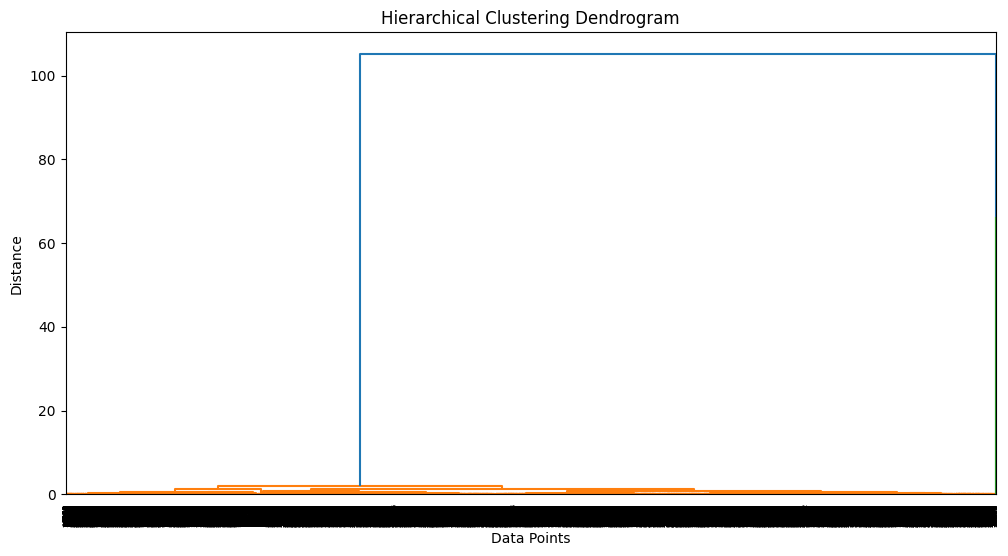

In [98]:
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance');

**Observation:** On the basis of our diverse dendrogram, we can see that the tree is complex at the bottom, but from top, we can decide that number of clusters to choose would be `1`. But to have the record with multiple results and we have the original dataset target algorithms too, for the safe side and performance mapping, we'll assign the cluster numbers to `2`.

To decide the Hierarchical Clustering Algorithm, we can use different methods. But we found that `Agglomerative Clustering` is more common and provides good results. So, we'll go with that

In [111]:
number_of_clusters = 2

clusters = AgglomerativeClustering(
    n_clusters=number_of_clusters, 
    linkage=linkage_criteria, 
    affinity=distance_metric
)

cluster_values = clusters.fit_predict(X_cluster_scaled)

In [121]:
np.unique(cluster_values)

array([0, 1], dtype=int64)

Let's display the clusters we have made

In [122]:
pd.Series(cluster_values).value_counts()

1    24281
0        2
dtype: int64

#### Evaluate the results of our Hierarchical clustering (AgglomerativeClustering) algorithm

In [123]:
from sklearn.metrics import silhouette_score

In [126]:
print(f"The score of Hierarchical Clustering Model is: {silhouette_score(X_cluster_scaled, cluster_values)*100:.2f}%")

The score of Hierarchical Clustering Model is: 98.90%


### KMeans Clustering Algorithm

In [127]:
from sklearn.cluster import KMeans

Let's try with the elbow method to find the optimal number of clusters to choose

In [128]:
clustering_scores = []

for num_clusters in range(1, 15):
    kmeans_model = KMeans(n_clusters=num_clusters, init="random", random_state=42)
    kmeans_model.fit(X_cluster_scaled)
    clustering_scores.append(kmeans_model.inertia_)

Let's plot the scores of our algorithm

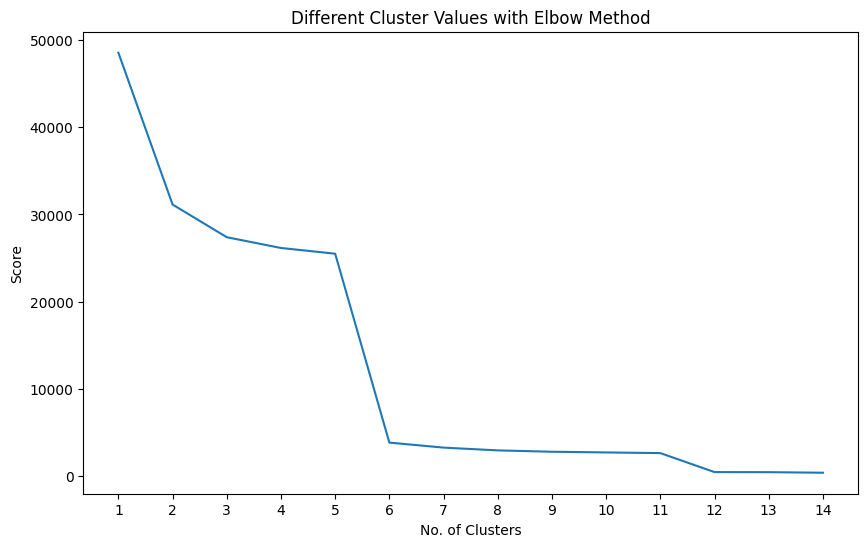

In [130]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), clustering_scores)
plt.title("Different Cluster Values with Elbow Method")
plt.xlabel("No. of Clusters")
plt.xticks(np.arange(1, 15, 1))
plt.ylabel("Score");

Our kmeans algorithm is also showing us that the clusters should be `1`. To have evaluation of model, will make it just `2` as the minimum clusters should be 2 to the length of features

Choosing the right clustering values after experimenting and fitting the right model to make predictions on it

In [131]:
kmeans_final = KMeans(n_clusters=2, random_state=42)
kmeans_final.fit(X_cluster_scaled)
kmeans_preds = kmeans_final.predict(X_cluster_scaled)
kmeans_preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [133]:
pd.Series(kmeans_preds).value_counts()

0    24281
1        2
dtype: int64

Evaluate the kmeans model

In [132]:
print(f"The score of KMeans Clustering Model is: {silhouette_score(X_cluster_scaled, kmeans_preds)*100:.2f}%")

The score of KMeans Clustering Model is: 98.90%


What if we try different clusters?

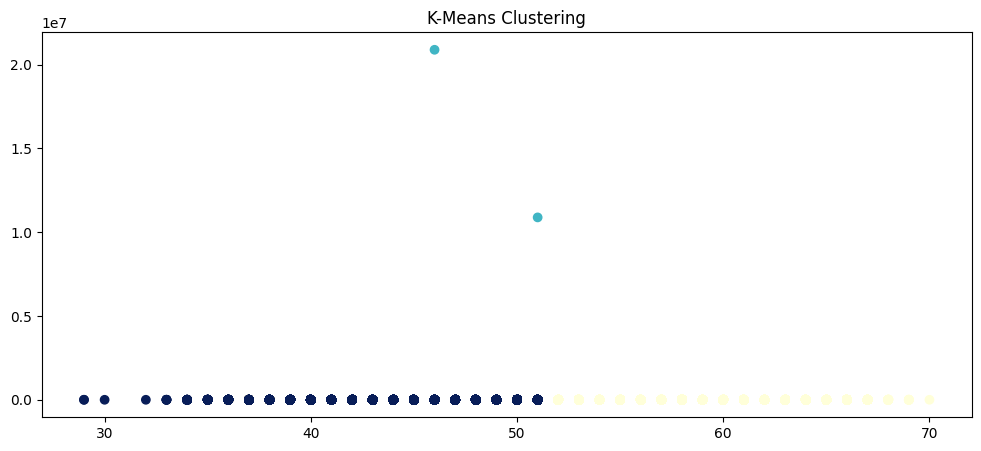

In [134]:
# Applying k-means clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)  
kmeans_labels = kmeans_model.fit_predict(X_cluster_scaled)

# Visualizing clusters
plt.figure(figsize=(12, 5))
plt.scatter(X_cluster['age'], X_cluster['BMI'], c=kmeans_labels, cmap='YlGnBu')
plt.title('K-Means Clustering');

Let's see what clusters are made from our model when n_clusters is 3

In [135]:
pd.Series(kmeans_labels).value_counts()

0    13834
2    10447
1        2
dtype: int64

We have seen that our unsupervised models suggested us that the cluster values should be 1. So, it means the data is shifting towards the imbalanced side. But when we tried implementing the more clusters, the values diversity started showing up. We can also see the results of our `kmeans` and `hierarchical` clustering models by observing their `score`.

Let's add the clusters in our actual data by making it look closer to the supervised format of data

In [136]:
kmeans_labels = np.where(kmeans_labels == 2, 1, kmeans_labels)

In [137]:
pd.Series(kmeans_labels).value_counts()

0    13834
1    10449
dtype: int64

In [138]:
# Add cluster labels to the original dataset
df['KMeans_Cluster'] = kmeans_labels

Observe the start and end of the dataset

In [139]:
df.head()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease,KMeans_Cluster
0,2,50,0,110.0,80.0,66.115702,1,1,1,0,1
1,1,55,0,140.0,90.0,45.918367,3,1,1,1,0
2,1,51,0,130.0,70.0,41.420118,3,1,0,1,1
3,2,48,0,150.0,100.0,44.444444,1,1,1,1,1
4,1,47,0,100.0,60.0,60.000000,1,1,0,0,1


In [140]:
df.tail()

,gender,age,smoke,sysBP,diaBP,BMI,Chol,glucose,active,CardioDisease,KMeans_Cluster
74233,2,50,1,179.0,92.0,25.97,3,1,1,1,1
74234,2,51,1,126.5,80.0,19.71,2,1,1,0,1
74235,1,48,1,131.0,72.0,22.00,3,1,1,0,1
74236,1,44,1,126.5,87.0,19.16,2,3,1,0,1
74237,1,52,0,133.5,83.0,21.47,3,2,1,0,0


## **Part 4: Supervised Learning (Classification)**

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "RandomForest Classifier": RandomForestClassifier()}

Note: We are using Logistic Regression and RandomForest Classifier for this binary classification problem.

### Logistic Regression Classifier

In [ ]:
LGR_model = LogisticRegression(solver = 'liblinear',
                               random_state = 0,
                               max_iter = 1000)


LGR_model.fit(X_train, y_train)     # training model on training dataset

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

Note: We have initialized Logistic Regression model with the 'liblinear' solver, a random state of 0, and a maximum of 300 iterations.

In [ ]:
# predicting target variable with LGR model on test data set
y_pred_LGR = LGR_model.predict(X_test)

In [ ]:
LGR_accuracy = accuracy_score(y_test, y_pred_LGR)
print(f"Accuracy of Logistic Regression Classifier : {LGR_accuracy.round(2) * 100}%")

Accuracy of Logistic Regression Classifier : 65.0%


We've experienced relatively low accuracy of our LGR model. To try overcome this issue, we are going to use RandomSearchCV to find best parameters for the Logistic Regressor Model.

In [ ]:
## Random Search CV

param_dist = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000, 1500],
    'solver': ["liblinear"]
}

# Using RandomSearchCV
random_search = RandomizedSearchCV(estimator=LGR_model,
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=5,
                                   random_state=0,
                                   verbose=True,
                                   scoring='accuracy')

In [ ]:
# Fitting the RSCV model to the data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=0,
                                                solver='liblinear'),
                   n_iter=20,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'max_iter': [100, 500, 1000, 1500],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   random_state=0, scoring='accuracy', verbose=True)

In [ ]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Accuracy: {random_search.best_score_*100:.2f}%")

Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1500, 'C': 0.1}
Best Accuracy: 65.11%


In [ ]:
random_search.score(X_test, y_test)

0.6465339739190117

In [ ]:
# defining LGR model with best parameters
best_LGR_model = random_search.best_estimator_

# Making predictions on the test dataset
y_pred_LGR = best_LGR_model.predict(X_test)

In [ ]:
# Accuracy score of LGR model with RandomSearch
LGR_best_accuracy = accuracy_score(y_test, y_pred_LGR)
print(f"Accuracy of Logistic Regressor with RSCV: {LGR_best_accuracy.round(2)*100}%")

Accuracy of Logistic Regressor with RSCV: 65.0%


**Observation:** Performing hyper-paramter tuning through RandomSearchCV did not help in increasing the accuracy for the LGR model.  

### Random Forest Classifier

In [ ]:
RFC_model = RandomForestClassifier(criterion = 'gini',
                                   n_estimators = 300,
                                   max_depth=7 )

RFC_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, n_estimators=300)

Note: Our RFC model will work with 300 trees, max depth of 7, and Gini impurity criterion.

In [ ]:
# predicting target variable with RFC model on test data set
y_pred_RFC = RFC_model.predict(X_test)

In [ ]:
# Accuracy score of RFC model
RFC_accuracy = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy of RandomForest Classifier : {RFC_accuracy*100:.2f}%")

Accuracy of RandomForest Classifier : 70.09%


### XGB Classifier

In [ ]:
xgb_model = XGBClassifier(random_state = 42)

XGB_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model to the training data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_pred_XGB = XGB_model.predict(X_test)

In [ ]:
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy of XGB Classifier : {XGB_accuracy.round(2)*100}%")

Accuracy of XGB Classifier : 70.0%


### Comparing predicted values

In [ ]:
# Predcition comparison for 10th row in test data set
print("LGR Predicted Value: " , y_pred_LGR[0] )
print("Actual True Value: " ,y_test.iloc[0])

LGR Predicted Value:  1
Actual True Value:  1


In [ ]:
# Predcition comparison for 10th row in test data set

print("RFC Predicted Value: " , y_pred_RFC[10] )
print("Actual True Value: " ,y_test.iloc[10])

RFC Predicted Value:  1
Actual True Value:  1


In [ ]:
df_LGR_predictions = pd.DataFrame({'Actual': y_test, 'LGR_Predictions': y_pred_LGR})
df_LGR_predictions.head()

,Actual,LGR_Predictions
49043,1,1
15137,0,0
37257,1,1
34858,1,0
14103,1,0


In [ ]:
df_RFC_predictions = pd.DataFrame({'Actual': y_test, 'RFC_Predictions': y_pred_RFC})
df_RFC_predictions.head()

,Actual,RFC_Predictions
49043,1,1
15137,0,0
37257,1,1
34858,1,1
14103,1,0


### Evaluation of Classification Models

#### Evaluation of LGR

In [ ]:
# Recall, Precision, F1 score of LGR model

LGR_recall = recall_score(y_test, y_pred_LGR)
LGR_precision = precision_score(y_test, y_pred_LGR)
LGR_f1 = f1_score(y_test, y_pred_LGR)

print("Recall score of Logistic Regressor : ", LGR_recall.round(2) )
print("Precision score of Logistic Regressor : ", LGR_precision.round(2) )
print("F1 score of Logistic Regressor : ", LGR_f1.round(2) )

Recall score of Logistic Regressor :  0.67
Precision score of Logistic Regressor :  0.65
F1 score of Logistic Regressor :  0.66


In [ ]:
# Precision Accuracy Interval LGR

num_bootstrap_samples = 50

# array to store the accuracy scores
accuracy_scores = np.zeros(num_bootstrap_samples)

#  bootstrapping
for i in range(num_bootstrap_samples):

    X_bootstrap, y_bootstrap = resample(X_train, y_train)

    LGR_model.fit(X_bootstrap, y_bootstrap)
    y_pred = LGR_model.predict(X_test)

    accuracy_scores[i] = accuracy_score(y_test, y_pred)

# Calculating the confidence interval
lower_bound = np.percentile(accuracy_scores, 2.5)
upper_bound = np.percentile(accuracy_scores, 97.5)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")

Accuracy: 64.41%
Confidence Interval: [0.6412, 0.6484]


#### Evaluation of RFC

In [ ]:
# Recall, Precision, F1 score of LGR model

RFC_recall = recall_score(y_test, y_pred_RFC)
RFC_precision = precision_score(y_test, y_pred_RFC)
RFC_f1 = f1_score(y_test, y_pred_RFC)

print("Recall score of RandomForest Classifer : ", RFC_recall.round(2))
print("Precision score of RandomForest Classifer : ", RFC_precision.round(2))
print("F1 score of RandomForest Classifer : ", RFC_f1.round(2))

Recall score of RandomForest Classifer :  0.73
Precision score of RandomForest Classifer :  0.7
F1 score of RandomForest Classifer :  0.71


In [ ]:
# Precision Accuracy Interval RFC

num_bootstrap_samples = 25
accuracy_scores = np.zeros(num_bootstrap_samples)

# bootstrapping
for i in range(num_bootstrap_samples):

    X_bootstrap, y_bootstrap = resample(X_train, y_train)

    RFC_model.fit(X_bootstrap, y_bootstrap)
    y_pred = RFC_model.predict(X_test)

    accuracy_scores[i] = accuracy_score(y_test, y_pred)


lower_bound = np.percentile(accuracy_scores, 2.5)
upper_bound = np.percentile(accuracy_scores, 97.5)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")

Accuracy: 69.66%
Confidence Interval: [0.6967, 0.7026]


#### Evaluation of XGBC

In [ ]:
XGB_recall = recall_score(y_test, y_pred_XGB)
XGB_precision = precision_score(y_test, y_pred_XGB)
XGB_f1 = f1_score(y_test, y_pred_XGB)

print("Recall score of XGB : ", XGB_recall.round(2) )
print("Precision score of XGB : ", XGB_precision.round(2) )
print("F1 score of XGB : ", XGB_f1.round(2) )

Recall score of XGB :  0.74
Precision score of XGB :  0.7
F1 score of XGB :  0.72


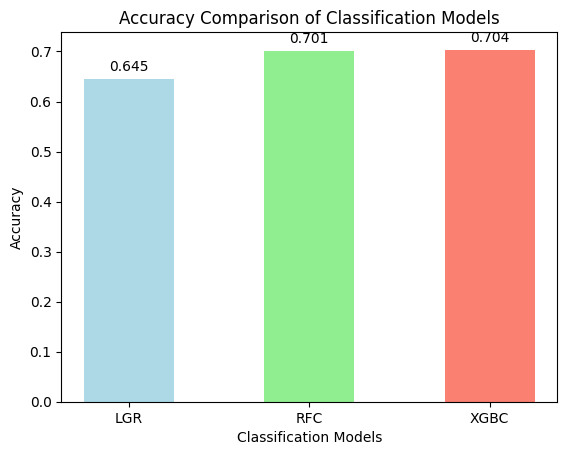

In [ ]:
accuracy_scores = [LGR_accuracy, RFC_accuracy, XGB_accuracy]
models = ['LGR', 'RFC', 'XGBC',]

plt.bar(models, accuracy_scores, color=['lightblue', 'lightgreen', 'salmon'], width=0.5)

plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Classification Models')

for i, v in enumerate(accuracy_scores):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', va='bottom')

plt.show();

## Conclusion

To summarize, in this project we conducted a comprehensive analysis of predicting cardiovascular disease among patients, based on some key features and attributes, through pre-processing data, performing necessary EDA to find relevancy and important insights about the data, following supervised and unsupervised machine learning endeavors. Compare and contrast the performance of different models and methods. Key insights emerged during the process, identifying age and BMI weighed with highest feature importance in our dataset. 

Supervised learning models, including Support Vector Regression (SVR) and Random Forest Regression (RFR), showcased distinct performances. SVR, while yielding accurate predictions, exhibited a higher mean absolute error (MAE) and root mean squared error (RMSE) compared to RFR. The classification phase introduced Logistic Regression (LGR), Random Forest Classifier (RFC), and XGB Classifier, where XGB demonstrated superior accuracy. The accuracy results of LGR were not satisfactory even after performing RandomSearchCV to find best possible parameters, the model did not yield a good accuracy score. So, I used XGB Classifier and manually initialized parameters with hyper parameter tuning, which performed better than both LGR and RFC models. 
Unsupervised learning with KMeans and Hierarchical Clustering (AgglomerativeClustering) highlighted the significance of age and BMI in clustering, with both the models tending towards the single cluster to be produced. To evaluate the performance of the model, silhouette_score was calculated which highlighted the patterns learning of unsupervised models.

The models could explore fine-tuning model parameters and incorporating additional features for a more comprehensive understanding. In conclusion, our analysis underscores the intricate interplay of features in cardiovascular disease prediction, emphasizing the importance of thoughtful model selection and the continuous pursuit of refining methodologies for more accurate and actionable insights in the realm of healthcare analytics.
